In [ ]:
"""
EDA and visualization.

"""

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, log_loss

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor, StackingClassifier)

In [4]:
# Load data
df_train = pd.read_pickle('../dump/df_train.csv')
df_test = pd.read_pickle('../dump/df_test.csv')


X_train = pd.read_pickle('../dump/X_adasyn')
y_train = pd.read_pickle('../dump/y_adasyn')
X_test = pd.read_pickle('../dump/X_test_processed')
y_test = df_test['target']

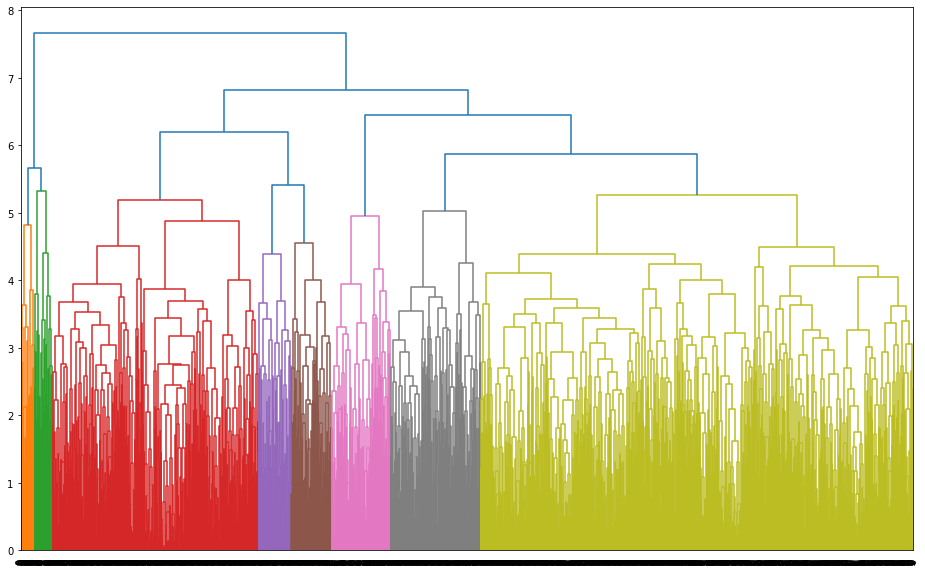

In [7]:
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
# sample_train,sample_val, gt_train, gt_val = train_test_split(train_df,
#                                                              train_df['Survived'],
#                                                              test_size=0.05,
#                                                              random_state=99)

# sample_val_processed = simple_preprocessing(sample_val, train = False)
# sample_val_processed = scaler.fit_transform(sample_val_processed)
mergings = linkage(X_test, method='complete')
fig = plt.figure(figsize = (16,10))

dendrogram(mergings,
           labels=np.array(y_test),
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

In [8]:
X_train

,city_development_index,training_hours,experience,last_new_job,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,enrolled_university_unknown,education_level_High School,education_level_Masters,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_unknown
0,0.738919,-0.488985,1.793483,-0.588135,0.00000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.428410,-0.305825,0.530812,1.816493,1.00000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.660590,0.293607,-0.731859,-1.189292,1.00000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.323026,-0.222571,-1.300061,-1.189292,1.00000,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.501368,-0.955209,1.793483,1.215336,0.00000,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,0.316702,-0.564869,-0.473409,-0.588135,0.00000,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28832,0.472487,-0.425288,0.459461,-0.588135,0.78254,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28833,0.770312,-0.283658,0.430281,1.337864,0.00000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28834,0.738919,-0.152315,0.445527,1.410450,0.00000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 1. EDA

### Categorical data visualization

In [107]:
cat_variables = ['relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type']
X_train_cat = df_train[cat_variables]

ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train_cat) 
cats = ohe.transform(X_train_cat)
columns = ohe.get_feature_names(cat_variables)
X_train_cat_df = pd.DataFrame(cats, columns=columns, index=X_train_cat.index)
X_train_cat_df.head()
X_train_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   relevent_experience_Has relevent experience  19158 non-null  float64
 1   relevent_experience_No relevent experience   19158 non-null  float64
 2   enrolled_university_Full time course         19158 non-null  float64
 3   enrolled_university_Part time course         19158 non-null  float64
 4   enrolled_university_no_enrollment            19158 non-null  float64
 5   enrolled_university_unknown                  19158 non-null  float64
 6   education_level_Graduate                     19158 non-null  float64
 7   education_level_High School                  19158 non-null  float64
 8   education_level_Masters                      19158 non-null  float64
 9   education_level_Phd                          19158 non-null  float64
 10

#### A. Company type

In [175]:
df = pd.concat([X_train_cat_df.iloc[:,-7:],y_train],axis='columns').\
groupby('target').sum().transpose().rename(columns={0:'No', 1:'Yes'}).\
reindex(['company_type_Early Stage Startup', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'company_type_Other', 'company_type_unknown'])
df

target,No,Yes
company_type_Early Stage Startup,461.0,142.0
company_type_Funded Startup,861.0,140.0
company_type_NGO,424.0,97.0
company_type_Public Sector,745.0,210.0
company_type_Pvt Ltd,8042.0,1775.0
company_type_Other,92.0,29.0
company_type_unknown,3756.0,2384.0


In [176]:
index = df.index
labels = [x.split('_')[2] for x in index]

In [177]:
# Convert to percentage
df['Yes(%)'] = df['Yes']*100/(df['No'] + df['Yes'])
df['No(%)'] = df['No']*100/(df['No'] + df['Yes'])
df_ = df[['Yes(%)','No(%)']]
df_

target,Yes(%),No(%)
company_type_Early Stage Startup,23.548922,76.451078
company_type_Funded Startup,13.986014,86.013986
company_type_NGO,18.618042,81.381958
company_type_Public Sector,21.989529,78.010471
company_type_Pvt Ltd,18.080880,81.919120
company_type_Other,23.966942,76.033058
company_type_unknown,38.827362,61.172638


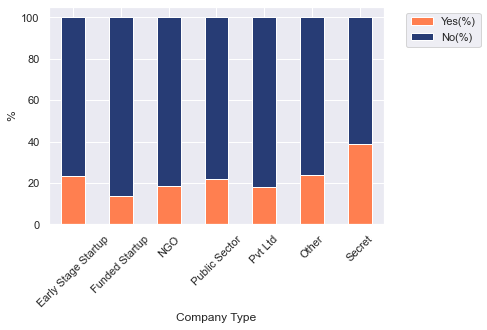

In [178]:
df_.plot(kind='bar',stacked=True,color=['coral','#273c75'])
plt.xlabel('Company Type')
plt.ylabel('%')
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
labels = [x.split('_')[2] for x in index]
labels[-1] = 'Secret'
plt.xticks([0,1,2,3,4,5,6],labels,rotation=45);

#### B. Company size

In [155]:
df_train.company_size.value_counts()

50-99        9021
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [267]:
df = pd.concat([X_train_cat_df.iloc[:,19:27],y_train],axis='columns').\
groupby('target').sum().transpose().rename(columns={0:'No', 1:'Yes'}).\
reindex(['company_size_<10','company_size_10/49', 'company_size_50-99', 'company_size_100-500', 'company_size_500-999',
         'company_size_1000-4999','company_size_5000-9999','company_size_10000+'])
df

target,No,Yes
company_size_<10,1084.0,224.0
company_size_10/49,1127.0,344.0
company_size_50-99,6066.0,2955.0
company_size_100-500,2156.0,415.0
company_size_500-999,725.0,152.0
company_size_1000-4999,1128.0,200.0
company_size_5000-9999,461.0,102.0
company_size_10000+,1634.0,385.0


In [268]:
df.index

Index(['company_size_<10', 'company_size_10/49', 'company_size_50-99',
       'company_size_100-500', 'company_size_500-999',
       'company_size_1000-4999', 'company_size_5000-9999',
       'company_size_10000+'],
      dtype='object')

In [269]:
# Convert to percentage
df['Yes(%)'] = df['Yes']*100/(df['No'] + df['Yes'])
df['No(%)'] = df['No']*100/(df['No'] + df['Yes'])
df_ = df[['Yes(%)','No(%)']]
df_

target,Yes(%),No(%)
company_size_<10,17.125382,82.874618
company_size_10/49,23.385452,76.614548
company_size_50-99,32.756901,67.243099
company_size_100-500,16.141579,83.858421
company_size_500-999,17.331813,82.668187
company_size_1000-4999,15.060241,84.939759
company_size_5000-9999,18.117229,81.882771
company_size_10000+,19.068846,80.931154


In [270]:
index = df.index
labels = [x.split('_')[2] for x in index]
labels[0] = '10-49'
labels

['10-49',
 '10/49',
 '50-99',
 '100-500',
 '500-999',
 '1000-4999',
 '5000-9999',
 '10000+']

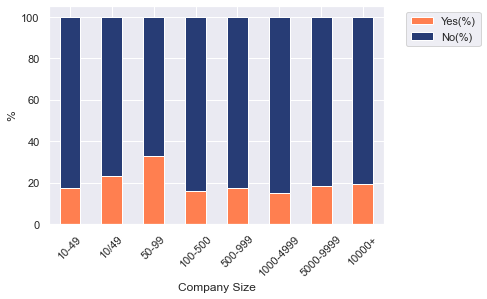

In [271]:
df_.plot(kind='bar',stacked=True,color=['coral','#273c75'])
plt.xlabel('Company Size')
plt.ylabel('%')
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(list(range(len(labels))),labels,rotation=45);

#### C. Major

In [226]:
df_train.major_discipline.value_counts()

STEM               14492
unknown             2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [272]:
df = pd.concat([X_train_cat_df.iloc[:,12:19],y_train],axis='columns').\
groupby('target').sum().transpose().rename(columns={0:'No', 1:'Yes'})

In [273]:
df.index

Index(['major_discipline_Arts', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'major_discipline_unknown'],
      dtype='object')

In [274]:
df = df.reindex(['major_discipline_Arts', 'major_discipline_Business Degree',
       'major_discipline_Humanities','major_discipline_STEM',
        'major_discipline_Other', 'major_discipline_No Major', 'major_discipline_unknown'])
df

target,No,Yes
major_discipline_Arts,200.0,53.0
major_discipline_Business Degree,241.0,86.0
major_discipline_Humanities,528.0,141.0
major_discipline_STEM,10701.0,3791.0
major_discipline_Other,279.0,102.0
major_discipline_No Major,168.0,55.0
major_discipline_unknown,2264.0,549.0


In [275]:
# Convert to percentage
df['Yes(%)'] = df['Yes']*100/(df['No'] + df['Yes'])
df['No(%)'] = df['No']*100/(df['No'] + df['Yes'])
df_ = df[['Yes(%)','No(%)']]
df_

target,Yes(%),No(%)
major_discipline_Arts,20.948617,79.051383
major_discipline_Business Degree,26.299694,73.700306
major_discipline_Humanities,21.076233,78.923767
major_discipline_STEM,26.159260,73.840740
major_discipline_Other,26.771654,73.228346
major_discipline_No Major,24.663677,75.336323
major_discipline_unknown,19.516530,80.483470


In [277]:
index = df.index
labels = [x.split('_')[2] for x in index]
labels[-1] = 'Secret'
labels

['Arts',
 'Business Degree',
 'Humanities',
 'STEM',
 'Other',
 'No Major',
 'Secret']

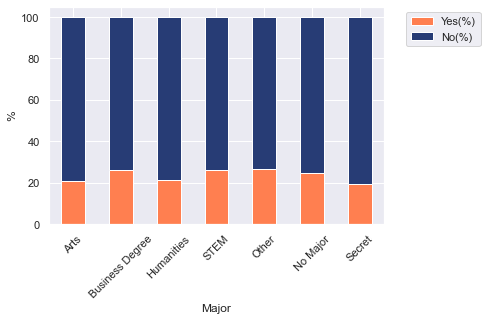

In [278]:
df_.plot(kind='bar',stacked=True,color=['coral','#273c75'])
plt.xlabel('Major')
plt.ylabel('%')
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(list(range(len(labels))),labels,rotation=45);

#### D. Education level

In [234]:
df_train.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
unknown             460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [279]:
df = pd.concat([X_train_cat_df.iloc[:,6:12],y_train],axis='columns').\
groupby('target').sum().transpose().rename(columns={0:'No', 1:'Yes'})

In [280]:
df.index

Index(['education_level_Graduate', 'education_level_High School',
       'education_level_Masters', 'education_level_Phd',
       'education_level_Primary School', 'education_level_unknown'],
      dtype='object')

In [281]:
df = df.reindex(['education_level_Phd','education_level_Masters', 
                 'education_level_Graduate', 'education_level_High School',
                 'education_level_Primary School', 'education_level_unknown'])
df

target,No,Yes
education_level_Phd,356.0,58.0
education_level_Masters,3426.0,935.0
education_level_Graduate,8353.0,3245.0
education_level_High School,1623.0,394.0
education_level_Primary School,267.0,41.0
education_level_unknown,356.0,104.0


In [282]:
# Convert to percentage
df['Yes(%)'] = df['Yes']*100/(df['No'] + df['Yes'])
df['No(%)'] = df['No']*100/(df['No'] + df['Yes'])
df_ = df[['Yes(%)','No(%)']]
df_

target,Yes(%),No(%)
education_level_Phd,14.009662,85.990338
education_level_Masters,21.440037,78.559963
education_level_Graduate,27.978962,72.021038
education_level_High School,19.533961,80.466039
education_level_Primary School,13.311688,86.688312
education_level_unknown,22.608696,77.391304


In [284]:
index = df.index
labels = [x.split('_')[2] for x in index]
labels[-1] = 'Secret'
labels

['Phd', 'Masters', 'Graduate', 'High School', 'Primary School', 'Secret']

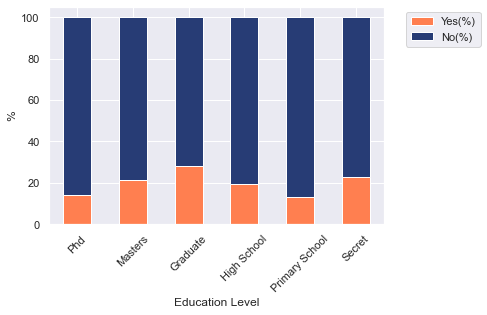

In [285]:
df_.plot(kind='bar',stacked=True,color=['coral','#273c75'])
plt.xlabel('Education Level')
plt.ylabel('%')
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(list(range(len(labels))),labels,rotation=45);

#### E. Enrolled university

In [242]:
df_train.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
unknown               386
Name: enrolled_university, dtype: int64

In [292]:
df = pd.concat([X_train_cat_df.iloc[:,2:6],y_train],axis='columns').\
groupby('target').sum().transpose().rename(columns={0:'No', 1:'Yes'})

In [293]:
df.index

Index(['enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'enrolled_university_unknown'],
      dtype='object')

In [294]:
# df = df.reindex(['education_level_Phd','education_level_Masters', 
#                  'education_level_Graduate', 'education_level_High School',
#                  'education_level_Primary School'])
# df

In [295]:
# Convert to percentage
df['Yes(%)'] = df['Yes']*100/(df['No'] + df['Yes'])
df['No(%)'] = df['No']*100/(df['No'] + df['Yes'])
df_ = df[['Yes(%)','No(%)']]
df_

target,Yes(%),No(%)
enrolled_university_Full time course,38.088901,61.911099
enrolled_university_Part time course,25.208681,74.791319
enrolled_university_no_enrollment,21.140624,78.859376
enrolled_university_unknown,31.865285,68.134715


In [296]:
index = df.index
labels = [x.split('_')[2] for x in index]
labels[-2] = 'No enrollment'
labels[-1] = 'Unknown'
labels

['Full time course', 'Part time course', 'No enrollment', 'Unknown']

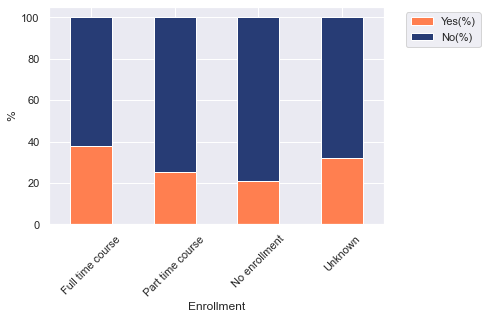

In [297]:
df_.plot(kind='bar',stacked=True,color=['coral','#273c75'])
plt.xlabel('Enrollment')
plt.ylabel('%')
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(list(range(len(labels))),labels,rotation=45);

#### F. Relevant experience

In [249]:
df_train.relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [298]:
df = pd.concat([X_train_cat_df.iloc[:,:2],y_train],axis='columns').\
groupby('target').sum().transpose().rename(columns={0:'No', 1:'Yes'})

In [299]:
df.index

Index(['relevent_experience_Has relevent experience', 'relevent_experience_No relevent experience'], dtype='object')

In [245]:
# df = df.reindex(['education_level_Phd','education_level_Masters', 
#                  'education_level_Graduate', 'education_level_High School',
#                  'education_level_Primary School'])
# df

In [300]:
# Convert to percentage
df['Yes(%)'] = df['Yes']*100/(df['No'] + df['Yes'])
df['No(%)'] = df['No']*100/(df['No'] + df['Yes'])
df_ = df[['Yes(%)','No(%)']]
df_

target,Yes(%),No(%)
relevent_experience_Has relevent experience,21.468968,78.531032
relevent_experience_No relevent experience,33.842713,66.157287


In [302]:
index = df.index
labels = [x.split('_')[2] for x in index]
labels[0] = 'Has relevant experience'
labels[1] = 'No relevant experience'
labels

['Has relevant experience', 'No relevant experience']

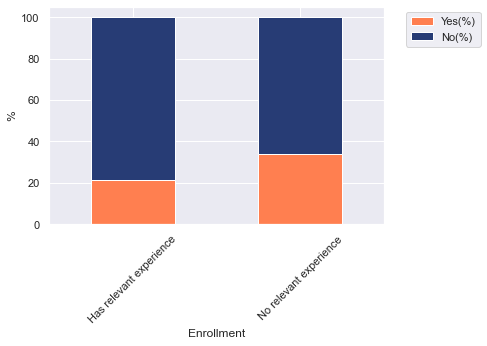

In [303]:
df_.plot(kind='bar',stacked=True,color=['coral','#273c75'])
plt.xlabel('Enrollment')
plt.ylabel('%')
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(list(range(len(labels))),labels,rotation=45);

### Continuous data visualization

In [318]:
features = ['city_development_index', 'training_hours', 'experience', 'last_new_job']

scaler = StandardScaler()
X_train_con_scaled = scaler.fit_transform(df_train[features])
cont_columns = df_train[features].columns
X_train_con_df = pd.concat([pd.DataFrame(X_train_con_scaled, columns=cont_columns, index=df_train[features].index),\
                            df_train['target']],axis='columns')

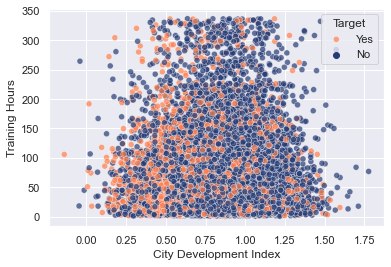

In [387]:
# Without standardizing
X_train_con = df_train[features]
X_train_con_raw = pd.concat([pd.DataFrame(X_train_con, columns=cont_columns, index=df_train[features].index),\
                            df_train['target']],axis='columns')
X_train_con_raw['city_development_index_rd'] = X_train_con_raw['city_development_index'] + np.random.normal(0,0.2, size=len(X_train_con_df))
X_train_con_raw['training_hours_rd'] = X_train_con_raw['training_hours'] + np.random.normal(0,0.2, size=len(X_train_con_df))

fig, ax = plt.subplots()
sns.scatterplot(x='city_development_index_rd',y='training_hours_rd',data=X_train_con_raw,
                palette=['#273c75','coral'],hue='target',alpha=0.7)
plt.legend(title='Target',labels=['Yes','No']);
ax.set_xlabel('City Development Index')
ax.set_ylabel('Training Hours');

In [315]:
X_train_con_df['city_development_index','training_hours']

In [357]:
X_train_con_df['city_development_index_rd'] = X_train_con_df['city_development_index'] + np.random.normal(0,0.2, size=len(X_train_con_df))
X_train_con_df['training_hours_rd'] = X_train_con_df['training_hours'] + np.random.normal(0,0.2, size=len(X_train_con_df))
X_train_con_df['experience_rd'] = X_train_con_df['experience'] + np.random.normal(0,0.2, size=len(X_train_con_df))
X_train_con_df['last_new_job_rd'] = X_train_con_df['last_new_job'] + np.random.normal(0,0.2, size=len(X_train_con_df))

In [362]:
features_rd = ['city_development_index_rd', 'training_hours_rd', 'experience_rd', 'last_new_job_rd']

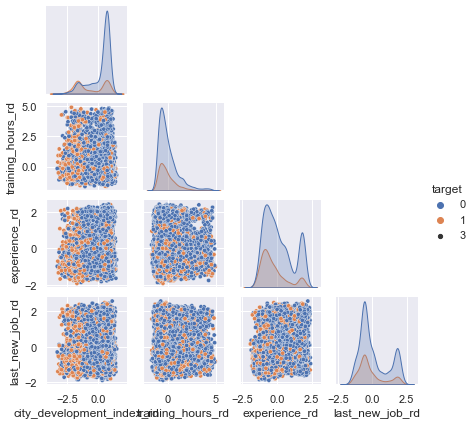

In [363]:
sns.pairplot(X_train_con_df[features_rd+['target']], corner=True, height=1.5, plot_kws={'size': 3}, hue='target');

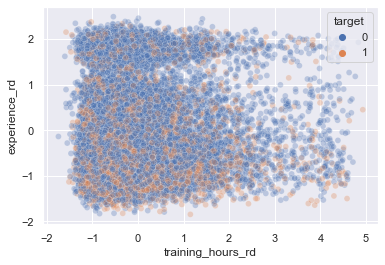

In [356]:
sns.scatterplot(x='training_hours_rd',y='experience_rd',data=X_train_con_df, hue='target',alpha=0.3);

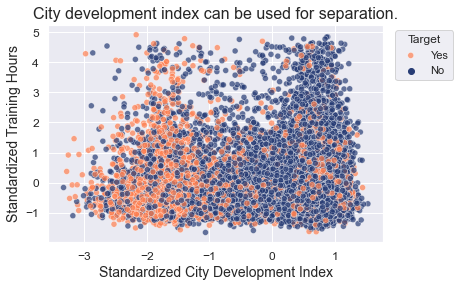

In [403]:
fig, ax = plt.subplots()

sns.scatterplot(x='city_development_index_rd',y='training_hours_rd',data=X_train_con_df,
                palette=['#273c75','coral'],hue='target',alpha=0.7)
plt.legend(title='Target',labels=['Yes','No'],bbox_to_anchor=(1.02, 1));
ax.set_title('City development index can be used for separation.',fontsize=16)
ax.set_xlabel('Standardized City Development Index',fontsize=14)
ax.set_ylabel('Standardized Training Hours',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

fig.savefig('../plot/EDA_1.pdf', bbox_inches='tight', transparent=True)

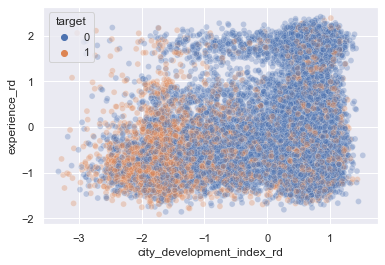

In [358]:
sns.scatterplot(x='city_development_index_rd',y='experience_rd',data=X_train_con_df, hue='target',alpha=0.3);

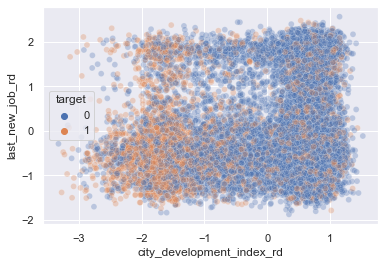

In [367]:
sns.scatterplot(x='city_development_index_rd',y='last_new_job_rd',data=X_train_con_df, hue='target',alpha=0.3);

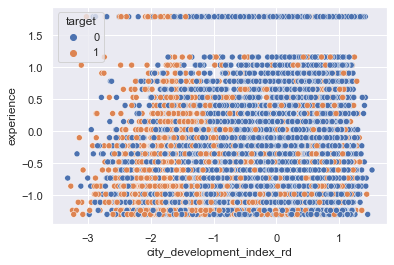

In [364]:
sns.scatterplot(x='city_development_index_rd',y='experience',data=X_train_con_df, hue='target');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='city_development_index'>

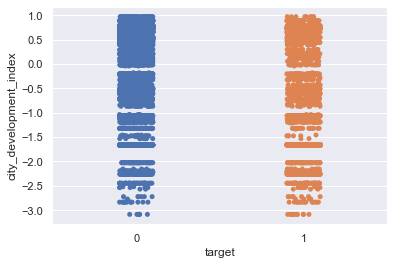

In [329]:
sns.stripplot('target','city_development_index',data=X_train_con_df)